# **SVHN Digit Recognition**

# **Solution by: 'Femi Bolarinwa**


--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks.

-------------
## **Dataset**
-------------
Here, I will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. You should use a subset of the dataset to save computation time. The images are available in a single channel (grayscale) in 32 x 32 pixels.

##**Solution Content Overview**
- **Data Importation**
- **Libraries importation**
- **Visualization of Data**
- **Data pre-processing**
- **Modelling and Evaluation - ANN**
- **Modelling and Evaluation - CNN**
- **Conclusion and Insights**

## **Data Importation**

I'll start by mounting the Google drive.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
#uploaded = files.upload()

Saving SVHN_single_grey1.h5 to SVHN_single_grey1.h5


**Libraries Importation**

In [ ]:
#Libraries for data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Libraries for neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, losses, optimizers, utils #FB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Input, GlobalAveragePooling2D, LeakyReLU, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

#Libraries for model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**I'll check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.12.0


## **Data Importation**

- I'll load the dataset that is available as a .h5 file.
- And then split the data into the train and the test dataset.

In [ ]:
import h5py
# Open the file as read only

h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5', 'r') #FB
#h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Loading the training and the test dataset
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

# Close this file
#h5f.close()

Number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape #FB

((42000, 32, 32), (18000, 32, 32), (42000,), (18000,))

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## **Visualizing images**

- I'll use X_train to visualize the first 10 images.
- I'll use Y_train to print the first 10 labels.

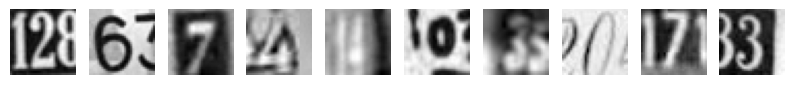

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels
plt.figure(figsize = (10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap = "gray")
    plt.xlabel([y_train[i]]) #FB
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data pre-processing**

- I'll print the shape and the array of pixels for the first image in the training dataset.
- I'll normalize the train and the test dataset by dividing by 255. This helps to prevent exploding gradient.
- I'll print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten them. I'm reshaping the 2D image into 1D array. otherwise i'll have to flatten inside the NN
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

**Normalizing the train and the test data.**

In [ ]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
# New shape 
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [ ]:
# One-hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

##ANN

In [ ]:
# Fixing the seed for random number generators to ensure exact results are reproducable 
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- ANN Model Architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compiling the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. 
- I'll print the summary of the model.
- And fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. 
- And store the model building history to use later for visualization.

### **Building and training ANN model as per the above mentioned architecture.**

In [ ]:
# Defining the model
def nn_model_1():
    model = Sequential() 
    # Adding layers as per the architecture mentioned above in the same sequence
    model.add(Dense(64, activation = 'relu', input_shape=(1024,)))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    # Compiling the model
    model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',  metrics = ['accuracy'])
    return model

In [ ]:
# Building the model
model_1 = nn_model_1()

In [ ]:
#ANN model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                65600     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the model
history_model_1 = model_1.fit(X_train, y_train, validation_split = 0.2, verbose = 1, batch_size = 128, epochs = 20)

Epoch 1/20
263/263 [==============================] - 3s 7ms/step - loss: 2.3001 - accuracy: 0.1028 - val_loss: 2.2833 - val_accuracy: 0.1186
Epoch 2/20
263/263 [==============================] - 2s 6ms/step - loss: 2.1704 - accuracy: 0.1865 - val_loss: 1.9455 - val_accuracy: 0.3038
Epoch 3/20
263/263 [==============================] - 2s 7ms/step - loss: 1.6959 - accuracy: 0.4225 - val_loss: 1.4936 - val_accuracy: 0.5096
Epoch 4/20
263/263 [==============================] - 2s 8ms/step - loss: 1.4426 - accuracy: 0.5219 - val_loss: 1.4359 - val_accuracy: 0.5240
Epoch 5/20
263/263 [==============================] - 2s 8ms/step - loss: 1.3451 - accuracy: 0.5652 - val_loss: 1.3182 - val_accuracy: 0.5729
Epoch 6/20
263/263 [==============================] - 2s 9ms/step - loss: 1.2716 - accuracy: 0.5954 - val_loss: 1.2630 - val_accuracy: 0.6060
Epoch 7/20
263/263 [==============================] - 2s 6ms/step - loss: 1.2252 - accuracy: 0.6159 - val_loss: 1.2189 - val_accuracy: 0.6251
Epoch 

### **Plotting the validation and training accuracies**

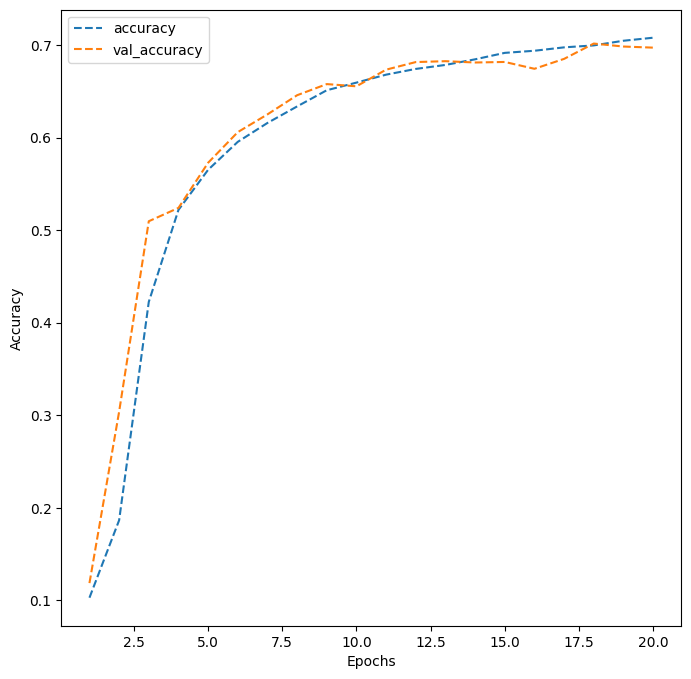

In [ ]:
# Plotting the accuracies
dict_hist = history_model_1.history
list_ep = [i for i in range(1, 21)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- ~70% accuracy on training and validation
- Decent, but could be better

I'll build one more ANN model with higher complexity and see if we can improve the performance of the model.

First, I need to clear the previous model's history from the Keras backend to save memory space. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second ANN Model Architecture**
- I'll write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - I'll Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**.
- I'll call the nn_model_2 function and store the model in a new variable.
- And print the summary of the model.
- And fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. 
- I'll store the model building history to use later for visualization.

### **Building and training the second ANN model as per the above mentioned architecture.**

In [ ]:
# Define the model
def nn_model_2():
    model = Sequential()  
    # Adding layers as per the architecture mentioned above in the same sequence
    model.add(Dense(256, activation = 'relu', input_shape=(1024,)))

    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.2))

    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation = 'softmax'))
    
    # Compiling the model
    model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'categorical_crossentropy',  metrics = ['accuracy'])
    
    return model

In [ ]:
# Building the model
model_2 = nn_model_2()

In [ ]:
# model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)              

In [ ]:
# Fitting the model
history_model_2 = model_2.fit(X_train, y_train, validation_split = 0.2, verbose = 1, batch_size = 128, epochs = 30)

Epoch 1/30
263/263 [==============================] - 5s 14ms/step - loss: 2.3374 - accuracy: 0.1029 - val_loss: 2.3058 - val_accuracy: 0.1092
Epoch 2/30
263/263 [==============================] - 5s 20ms/step - loss: 2.2158 - accuracy: 0.1539 - val_loss: 2.1663 - val_accuracy: 0.2448
Epoch 3/30
263/263 [==============================] - 4s 15ms/step - loss: 1.7252 - accuracy: 0.3918 - val_loss: 1.5989 - val_accuracy: 0.4875
Epoch 4/30
263/263 [==============================] - 3s 13ms/step - loss: 1.4240 - accuracy: 0.5238 - val_loss: 1.2962 - val_accuracy: 0.5742
Epoch 5/30
263/263 [==============================] - 3s 12ms/step - loss: 1.2421 - accuracy: 0.5943 - val_loss: 1.1814 - val_accuracy: 0.6225
Epoch 6/30
263/263 [==============================] - 5s 19ms/step - loss: 1.1818 - accuracy: 0.6160 - val_loss: 1.0895 - val_accuracy: 0.6490
Epoch 7/30
263/263 [==============================] - 4s 17ms/step - loss: 1.1195 - accuracy: 0.6405 - val_loss: 1.1064 - val_accuracy: 0.6383

### **Plotting the validation and training accuracies**

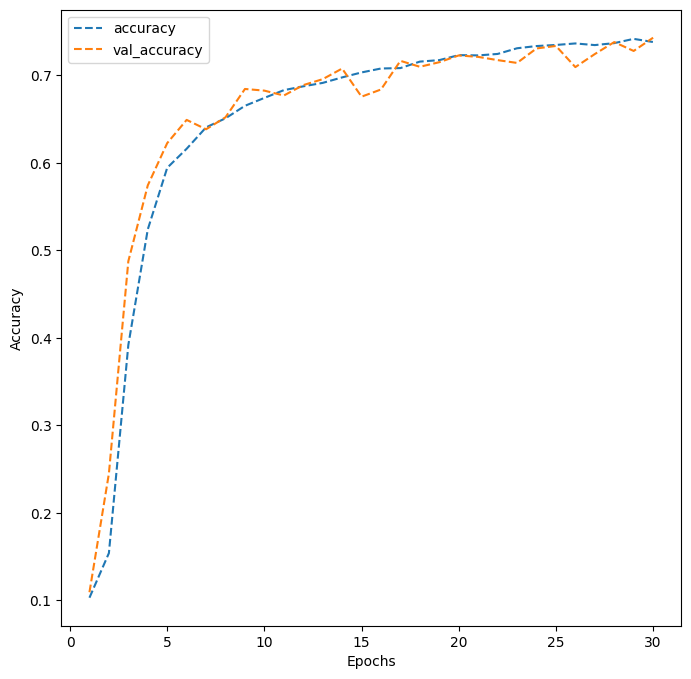

In [ ]:
# Plotting the accuracies
dict_hist = history_model_2.history
list_ep = [i for i in range(1, 31)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


**Observations:**
- ~74% accuracy on training and validation
- Bigger architecture, but no significant accuracy boost

## **Predictions on the test data**

- I'll make predictions on the test set using the second model.
- And print the obtained results using the classification report and the confusion matrix.

In [ ]:
test_pred = model_2.predict(X_test)
test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 4ms/step


**Note:** Earlier, noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, I must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis = -1)

### **Classification report and the confusion matrix for the test predictions.**

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1814
           1       0.77      0.79      0.78      1828
           2       0.67      0.82      0.74      1803
           3       0.66      0.74      0.70      1719
           4       0.82      0.78      0.80      1812
           5       0.77      0.65      0.71      1768
           6       0.78      0.70      0.74      1832
           7       0.77      0.79      0.78      1808
           8       0.68      0.72      0.70      1812
           9       0.73      0.72      0.72      1804

    accuracy                           0.74     18000
   macro avg       0.75      0.74      0.74     18000
weighted avg       0.75      0.74      0.74     18000



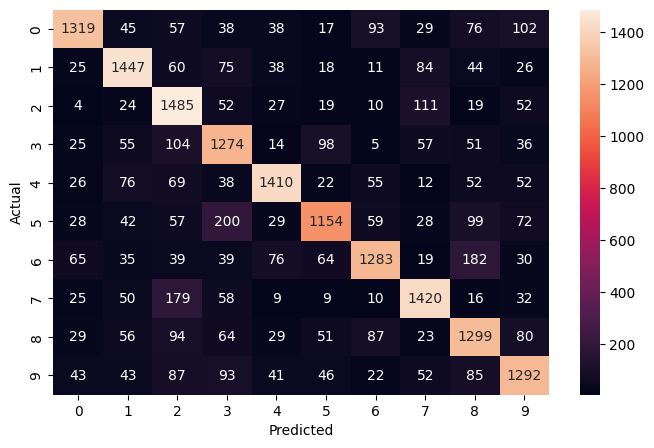

In [ ]:
# Printing the classification report
print(classification_report(y_test, test_pred))
# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)     
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**
- Accuracy: 74% 
- Recall: 74%
- Precision: 75%
- f1-score: 74%
- Similar accuracy on training and test dataset. Not overfitted
- Decent model, could be better

## **Convolutional Neural Networks**

In [ ]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

# Close this file
#h5f.close()

Number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape #FB

((42000, 32, 32), (18000, 32, 32), (42000,), (18000,))

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Data preparation**

- I'll print the shape and the array of pixels for the first image in the training dataset.
- I'll reshape the trainng and the test dataset because we always have to give a 4D array as input to CNNs.
- I'll normalize the train and the test dataset by dividing by 255.
- And rint the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to be able to pass them to CNNs. 4D array required as input to CNNs
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [ ]:
# Normalizing inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# New shape 
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encoding the labels in the target variable y_train and y_test.**

In [ ]:
#one-hot encoding the output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Each entry of the target variable is a one-hot encoded vector instead of a single label. Each element of the vector will represent the probability of the output belonging to that class

## **Model Building**

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **CNN Model Architecture**
- **CNN:**a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flattening** the output from the previous layer
 - **Dense layer with 32 nodes**
 - **LeakyRelu layer with the slope equal to 0.1**
 - Final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - I'll compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**.
- I'll call the function cnn_model_1 and store the output in a new variable.
- And print the summary of the model.
- And fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. 
- I'll store the model building history to use later for visualization.

### **Building and training CNN model as per the above mentioned architecture.**

In [ ]:
# Define the model
def cnn_model_1():
    model = Sequential() 
    # Adding layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    #model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2, 2))

    model.add(Flatten())

    model.add(Dense(32))
    model.add(LeakyReLU(0.1))

    model.add(Dense(10, activation = 'softmax'))
    
    # Compiling the model
    model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',  metrics = ['accuracy'])
    
    return model

In [ ]:
# Building the model
cnn_model_1 = cnn_model_1()

In [ ]:
# Printing the model summary
cnn_model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 32, 32, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                      

In [ ]:
# Fitting the model
history_cnn_model_1 = cnn_model_1.fit(X_train, y_train, validation_split = 0.2, verbose = 1, batch_size = 32, epochs = 20)

Epoch 1/20
1050/1050 [==============================] - 96s 90ms/step - loss: 1.1206 - accuracy: 0.6321 - val_loss: 0.6342 - val_accuracy: 0.8175
Epoch 2/20
1050/1050 [==============================] - 100s 95ms/step - loss: 0.5381 - accuracy: 0.8477 - val_loss: 0.5280 - val_accuracy: 0.8498
Epoch 3/20
1050/1050 [==============================] - 103s 98ms/step - loss: 0.4532 - accuracy: 0.8676 - val_loss: 0.5230 - val_accuracy: 0.8511
Epoch 4/20
1050/1050 [==============================] - 94s 89ms/step - loss: 0.3942 - accuracy: 0.8853 - val_loss: 0.4545 - val_accuracy: 0.8713
Epoch 5/20
1050/1050 [==============================] - 99s 94ms/step - loss: 0.3485 - accuracy: 0.8972 - val_loss: 0.4837 - val_accuracy: 0.8655
Epoch 6/20
1050/1050 [==============================] - 93s 89ms/step - loss: 0.3089 - accuracy: 0.9074 - val_loss: 0.4652 - val_accuracy: 0.8693
Epoch 7/20
1050/1050 [==============================] - 98s 93ms/step - loss: 0.2791 - accuracy: 0.9174 - val_loss: 0.4560

### **Plotting the validation and training accuracies**

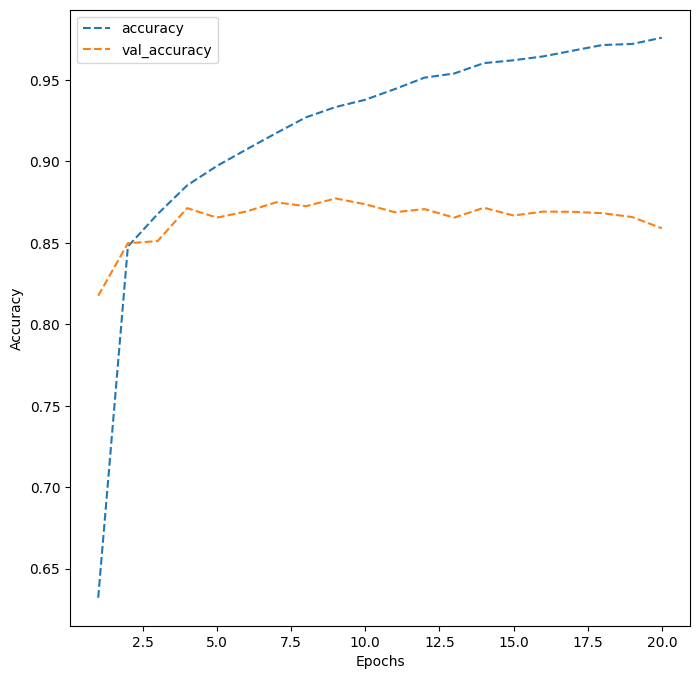

In [ ]:
# Plotting the accuracies
dict_hist = history_cnn_model_1.history
list_ep = [i for i in range(1, 21)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- Divergent training and validation accuracies. Model overfitted
- Decent accuracy, could be better. 
- Model fitting took a lot longer than ANN.

Let's build another model and see if we can get a better model with generalized performance.

First, I'll clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second CNN Model Architecture**

- I'll write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - A **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - A **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - A **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - A **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - A **LeakyRelu layer with the slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - A **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - A **dense layer with 32 nodes**
 - A **LeakyRelu layer with the slope equal to 0.1**
 - A **dropout layer with the rate equal to 0.5**
 - Final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - I'll compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**.
- I'll call the function cnn_model_2 and store the model in a new variable.
- And print the summary of the model.
- And fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. 
- I'll store the model building history to use later for visualization.

### **Building and training the second CNN model as per the above mentioned architecture.**

In [ ]:
# Define the model
def cnn_model_2():
    model = Sequential()

    #Adding layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    #model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2, 2))
    model.add(BatchNormalization())

    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))

    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2, 2))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation = 'softmax'))

    # Compiling the model
    model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',  metrics = ['accuracy'])
    
    
    return model

In [ ]:
# Building the model
cnn_model_2 = cnn_model_2()

In [ ]:
#model summary
cnn_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 32, 32, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                      

In [ ]:
# Fitting the model
history_cnn_model_2 = cnn_model_2.fit(X_train, y_train, validation_split = 0.2, verbose = 1, batch_size = 128, epochs = 30)

Epoch 1/30
263/263 [==============================] - 159s 598ms/step - loss: 1.3896 - accuracy: 0.5260 - val_loss: 1.7088 - val_accuracy: 0.5244
Epoch 2/30
263/263 [==============================] - 173s 660ms/step - loss: 0.6671 - accuracy: 0.7954 - val_loss: 0.6358 - val_accuracy: 0.8135
Epoch 3/30
263/263 [==============================] - 169s 642ms/step - loss: 0.5557 - accuracy: 0.8328 - val_loss: 0.5501 - val_accuracy: 0.8411
Epoch 4/30
263/263 [==============================] - 168s 638ms/step - loss: 0.4842 - accuracy: 0.8518 - val_loss: 0.4482 - val_accuracy: 0.8662
Epoch 5/30
263/263 [==============================] - 157s 597ms/step - loss: 0.4508 - accuracy: 0.8635 - val_loss: 0.4075 - val_accuracy: 0.8863
Epoch 6/30
263/263 [==============================] - 181s 689ms/step - loss: 0.4146 - accuracy: 0.8751 - val_loss: 0.3867 - val_accuracy: 0.8920
Epoch 7/30
263/263 [==============================] - 161s 611ms/step - loss: 0.3831 - accuracy: 0.8836 - val_loss: 0.4339 -

### **Plotting the validation and training accuracies**

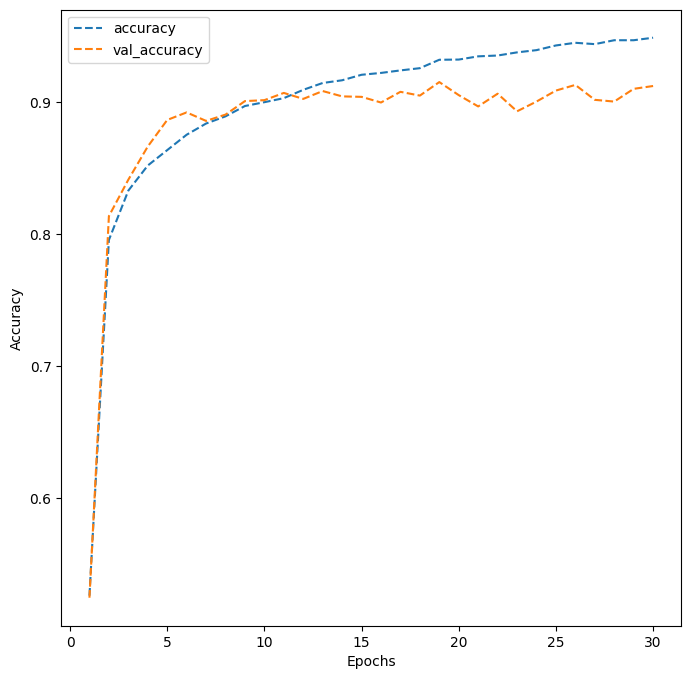

In [ ]:
# Plotting epoch accuracies
dict_hist = history_cnn_model_2.history
list_ep = [i for i in range(1, 31)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- Better accuracy than previous models
- Took more computation time

## **Predictions on the test data**

- Predictions on the test set using the second CNN model.
- and print the obtained results using the classification report and the confusion matrix.

### **Predictions on the test data using the second CNN model.** 

In [ ]:
#prediction on the test data using model_2 
test_pred =  cnn_model_2.predict(X_test)
test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 25s 45ms/step


**Note:** Earlier, noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, I will convert each entry of y_test to a single label.

In [ ]:
cnn_model_2.evaluate(X_test, y_test, verbose=2) #FB

563/563 - 20s - loss: 0.5098 - accuracy: 0.9140 - 20s/epoch - 36ms/step


[0.5097764730453491, 0.9139999747276306]

In [ ]:
# Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1814
           1       0.93      0.90      0.91      1828
           2       0.94      0.92      0.93      1803
           3       0.93      0.87      0.90      1719
           4       0.92      0.93      0.93      1812
           5       0.89      0.92      0.90      1768
           6       0.88      0.92      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.91      0.89      0.90      1812
           9       0.89      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



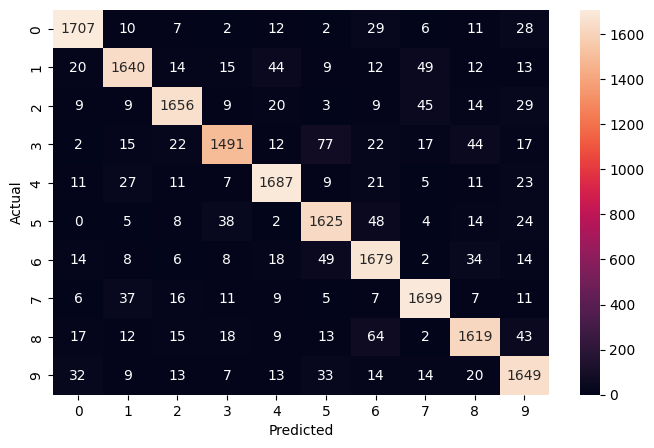

In [ ]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test, test_pred))
# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:**
- Accuracy: 91% 
- Recall: 91%
- Precision: 91%
- f1-score: 91%
- Significantly less misclassification
- Similar accuracy on training and test dataset.
- Great model, not overfitted.

## Conclusion and Recommendation
- CNN appears to perform better than ANN for feature extraction and hence higher accuracy
- However, this comes at the cost of more computational capacity requirement
- There is always a need to balance the need for higher accuracy and cost of complex architecture and hence computation time